# 1. Installing Dependencies and Setup

In [2]:
pip install tensorflow==2.12.0

  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras==2.10.0

  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.12.0 requires keras<2.13,>=2.12.0, but you have keras 2.10.0 which is incompatible.


In [4]:
pip install tensorflow-gpu==2.10.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.10.0 (from versions: 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.10.0


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [7]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.14.0
beautifulsoup4               4.12.2
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.0
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
defusedxml                   0.7.1
dm-tree                      0.1.8
executing                    2.0.1
fastjsonschema               2.19.0


In [10]:
import tensorflow as tf
import os

AttributeError: module 'inspect' has no attribute 'ArgSpec'

In [9]:
# to see all gpu available in the system
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
print(len(gpus))     # to get number of gpu available

NameError: name 'tf' is not defined

In [ ]:
# to see all cpu available in the system
gpus = tf.config.experimental.list_physical_devices('CPU')
print(gpus)
print(len(gpus))     # to get number of cpu available

In [ ]:
# to see number of files in folder
print(len(os.listdir(os.path.join('Plants','Pepper__bell___Bacterial_spot'))))

In [ ]:
# immage extensions that work
image_exts = ['jpeg','jpg','bmp','png']

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# reding an image using cv2
img = cv2.imread(os.path.join('test_set','r', '1.jpg'))
print(img)
# reads images numpy array

In [ ]:
plt.imshow(img)
# image would be bluish as opencv reads image as bgr not rgb

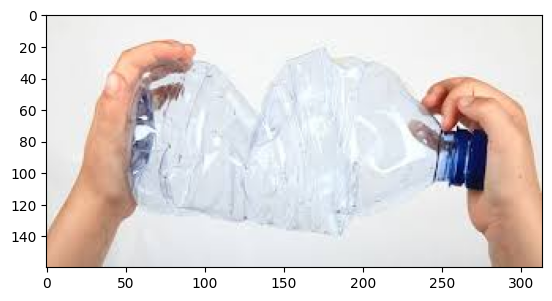

In [21]:
# to color it
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

# 2. Performing Cleanup of bad images

In [22]:
# looping through each image to remove bad images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image does not exist in extension list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print("Exception occured, ",e)
            print('Issue with image {}'.format(image_path))

In [23]:
# after cleanup number of images left
# to see number of files harzardous folder
print(len(os.listdir(os.path.join('train','r'))))

9999


In [24]:
# to see number of files recyclable folder
print(len(os.listdir(os.path.join('train','nr'))))

12565


# 2. Building Deep Learning Model
Using neural networks with multiple layers to learn patterns and make predictions

In [49]:
from keras.models import Sequential

# initialize cnn
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

#convert pooling features space to large feature vector for fully
#connected layer 
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense

from keras.layers import BatchNormalization
from keras.layers import Dropout

In [50]:
# CNN ARCHITECTURE
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(128,128, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(25, activation = 'softmax'))


In [52]:
# adam - optimizer
# defining losses
# ADAM optimizer
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 5. Training the Model
Iteratively optimizing model parameters using labeled data to minimize error and enable accurate predictions on new data

In [54]:
logdir = 'logs'

In [55]:
# callback important if we want to save the model at a particular checkpoint
# seeing the model
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
# 2 important methods of building a neural network
# model.fit - fit is a training component
# model.predict - it is used when we actually go and make predictions
# one epoch is how much time will we train for
# epoch is one run over our entire set of data

hist = model.fit(train, epochs=5, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
494/494 [==============================] - 592s 865ms/step - loss: 0.4399 - accuracy: 0.8078 - val_loss: 0.4141 - val_accuracy: 0.8248
Epoch 2/5
494/494 [==============================] - 187s 374ms/step - loss: 0.3645 - accuracy: 0.8461 - val_loss: 0.3790 - val_accuracy: 0.8440
Epoch 3/5
494/494 [==============================] - 170s 343ms/step - loss: 0.3192 - accuracy: 0.8684 - val_loss: 0.3598 - val_accuracy: 0.8526
Epoch 4/5
494/494 [==============================] - 166s 335ms/step - loss: 0.2671 - accuracy: 0.8921 - val_loss: 0.3997 - val_accuracy: 0.8537
Epoch 5/5
494/494 [==============================] - 167s 337ms/step - loss: 0.2125 - accuracy: 0.9159 - val_loss: 0.4495 - val_accuracy: 0.8422


In [57]:
hist.history

{'loss': [0.4398763179779053,
  0.3645016849040985,
  0.3191886246204376,
  0.26713141798973083,
  0.21247108280658722],
 'accuracy': [0.8077555894851685,
  0.8460906147956848,
  0.8684210777282715,
  0.8920799493789673,
  0.9159286618232727],
 'val_loss': [0.41414469480514526,
  0.37897616624832153,
  0.35977786779403687,
  0.3997064232826233,
  0.4494708478450775],
 'val_accuracy': [0.8248239159584045,
  0.8439700603485107,
  0.8525528311729431,
  0.8536531925201416,
  0.84220951795578]}

# 5. Plotting Performance

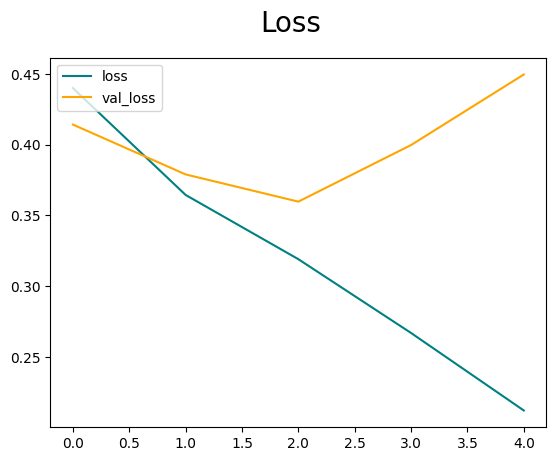

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

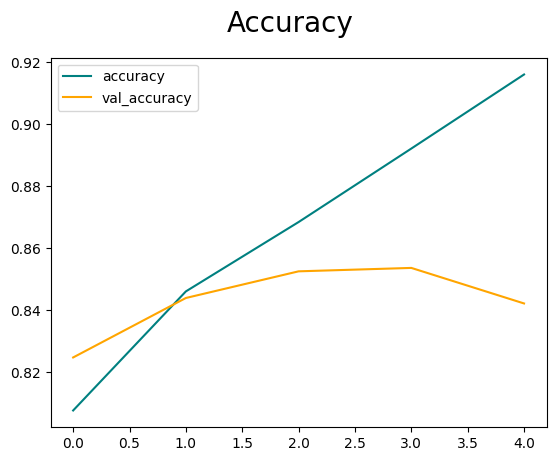

In [59]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 6. Evaluation

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [61]:
# metrics
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 63ms/step


In [63]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.803996205329895, Recall:0.8535353541374207, Accuracy:0.8455105423927307


# 7. Testing

In [64]:
import cv2

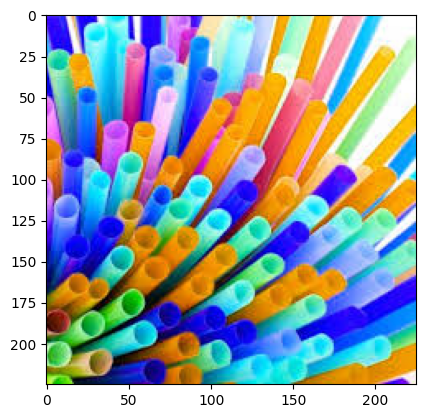

In [65]:
# aluminium can (Recyclable) test
img = cv2.imread('pipes_r.jpg')
plt.imshow(img)
plt.show()

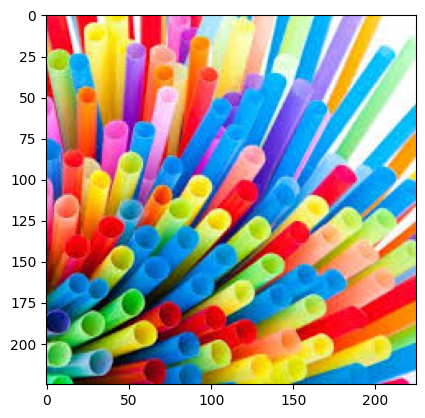

In [66]:
# color fixing
img = cv2.imread('pipes_r.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

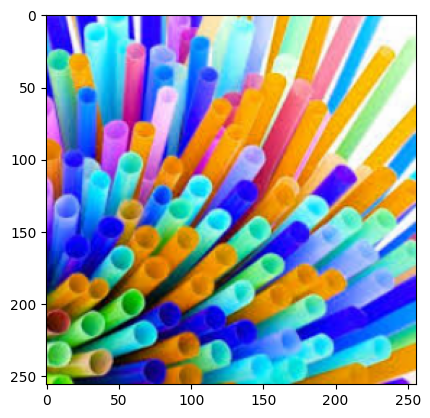

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 2s 2s/step


In [69]:
yhat

array([[0.0172183]], dtype=float32)

In [110]:
# correct prediction
# correct - recyclable

In [70]:
if yhat <= 0.5: 
    print(f'Predicted class is Recyclable')
else:
    print(f'Predicted class is Non-Recyclable')

Predicted class is Recyclable


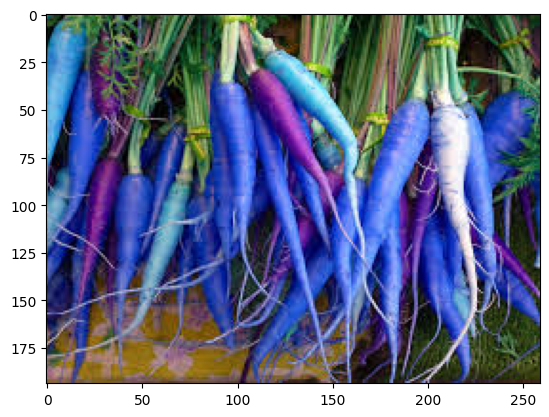

In [71]:
# grass (Organic) test
img = cv2.imread('organic_nr.jpg')
plt.imshow(img)
plt.show()

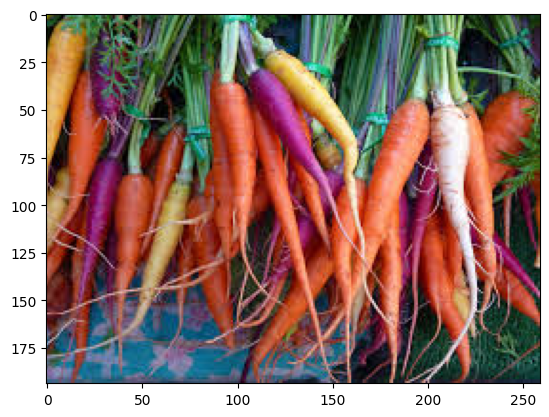

In [72]:
# color fixing
img = cv2.imread('organic_nr.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

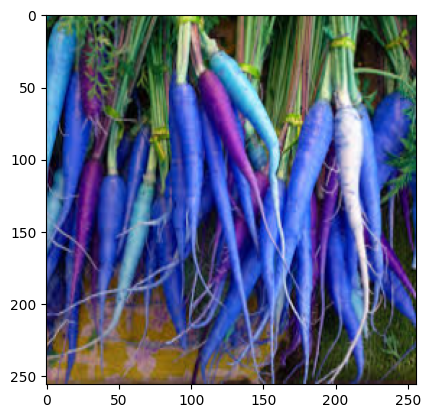

In [73]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [74]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 64ms/step


In [75]:
yhat

array([[0.99563354]], dtype=float32)

In [76]:
# correct prediction
# correct - organic - non recyclable

In [77]:
if yhat <= 0.5: 
    print(f'Predicted class is Recyclable')
else:
    print(f'Predicted class is Non-Recyclable')

Predicted class is Non-Recyclable


# 8. Saving the model

In [78]:
from tensorflow.keras.models import load_model

In [79]:
# .h is a serialization format
model.save(os.path.join('models','wastemodel.h5'))

In [80]:
os.path.join('models','wastemodel.h5')

'models\\wastemodel.h5'

In [81]:
new_model = load_model(os.path.join('models','wastemodel.h5'))

In [82]:
new_model

In [83]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 91ms/step
